<h6 style= 'color: red'>   Где дешевле жить? Предсказание цен в Airbnb - учимся генерировать признаки и интерпретировать результаты модели </h6>

<h6 style= 'color: blue'> В этом проекте я потренировался строить интерпретируемые модели линейной регрессии с регуляризацией и без, а также придумывать новые признаки для
улучшения качества модели.</h6>

####
- Часть 1. EDA

Скачайте данные с Kaggle по ценам на жильё в Airbnb в Нью-Йорке:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
Пройдите по основным шагам работы с данными:
выкиньте ненужные признаки: id, name, host_id, host_name, last_review
визуализируйте базовые статистики данных: распределения признаков, матрицу попарных корреляций, постройте pair plots
про результатам анализа произведите предобработку переменных

- Часть 2. Preprocessing & Feature Engineering
Ваша цель получить как можно более высокие метрики качества (можно взять несколько, R2, MAE, RMSE), сконцентрировавшись на преобразовании признаков.
Опробуйте различные техники:
работа с категориальными переменными (можно начать с dummy);
замена аномалий;
различные варианты шкалирования непрерывных переменных (StandardScaler, RobustScaler, и.т.д.);
обратите внимание на распределение целевой переменной, возможно, с ней тоже можно поработать;
Попробуйте на основании имеющихся переменных создать новые, которые могли бы улучшить качество модели. Например, можно найти координаты Манхэттена (самого дорогого района) и при помощи широты и долготы, а также евклидового расстояния создать новую переменную - расстояние от квартиры до этого района. Возможно, такой признак будет работать лучше, чем просто широта и долгота.
- Часть 3. Моделирование
Отложите 30% данных для тестирования.
Постройте модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV.
Измерьте качество каждой и визуализируйте важность признаков.
Сделайте интересные выводы :)
В ноутбуке желательно видеть:
Понятное описание: какие техники и алгоритмы были опробованы - было бы неплохо в самом начале тезисно выписать опробованные методики и их результат (помогло / не помогло).
Наличие визуализаций (не обязательно строить много графиков - можно несколько репрезентативных).
Наличие хотя бы одной модификации данных, приводящей к улучшению результатов.

#### Измерение:

####
- Измерены качества модели:
Linear Regression: R2 = 0.508, MAE = 0.352, RMSE = 0.482
RidgeCV: R2 = 0.508, MAE = 0.352, RMSE = 0.482
LassoCV: R2 = 0.509, MAE = 0.351, RMSE = 0.481
ElasticNetCV: R2 = 0.509, MAE = 0.351, RMSE = 0.481

### Выводы:
- Модели RidgeCV, LassoCV и ElasticNetCV имеют почти такие же значения метрик, как и модель линейной регрессии. Это означает, что регуляризация не дала значительного улучшения качества модели на этих данных.
- Модели LassoCV и ElasticNetCV имеют немного лучшие значения метрик, чем модели линейной регрессии и RidgeCV. Это означает, что L1-регуляризация, которая может обнулять незначимые коэффициенты признаков, дала небольшой прирост точности модели.
- Все модели имеют низкие значения R2 и высокие значения MAE и RMSE. Это означает, что модели не очень хорошо предсказывают логарифм цены на жилье в Airbnb в Нью-Йорке. 
- Возможно, это связано с тем, что данные не линейны или имеют много шума или выбросов.

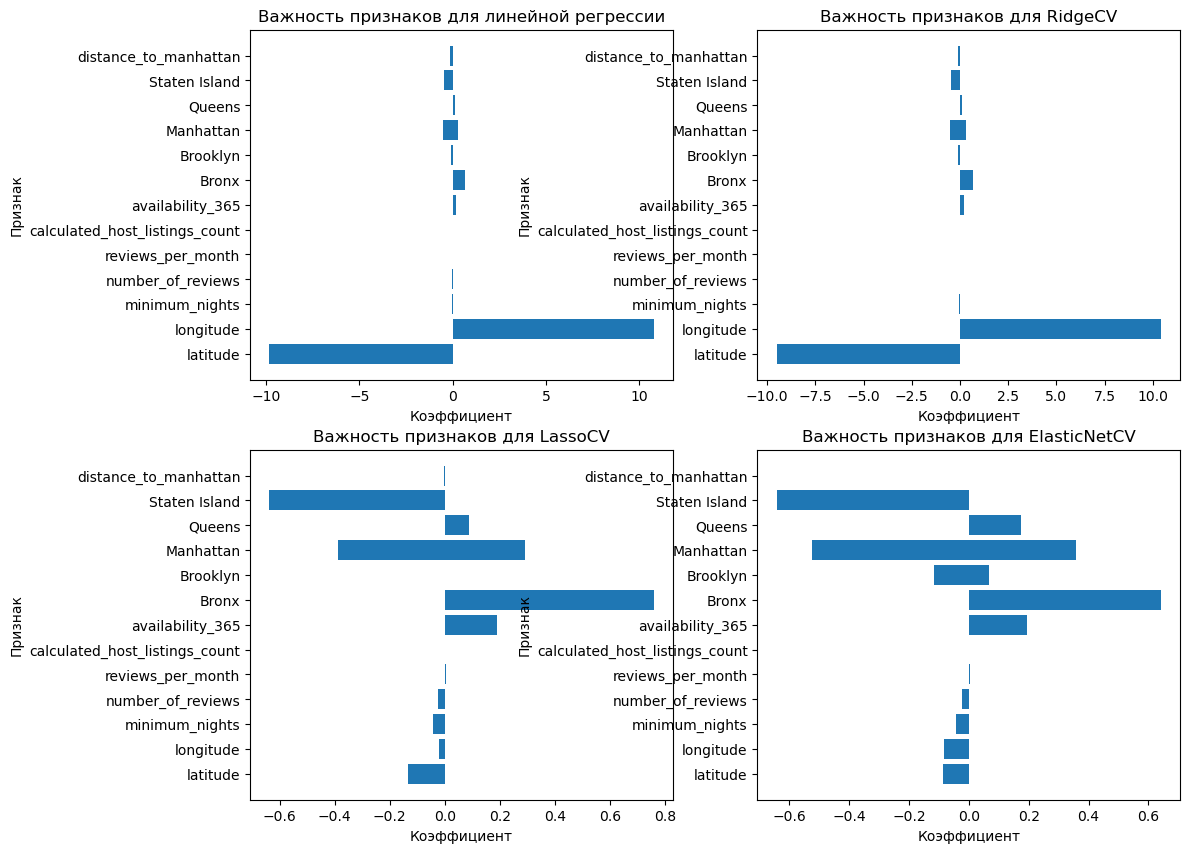

In [343]:
# Визуализация важности признаков для каждой модели с помощью горизонтальных столбчатых диаграмм

# Импортируем библиотеку matplotlib.pyplot для построения графиков
import matplotlib.pyplot as plt

# Создаем фигуру с четырьмя подграфиками
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Настраиваем заголовки и подписи осей для каждого подграфика
axes[0, 0].set_title('Важность признаков для линейной регрессии')
axes[0, 0].set_xlabel('Коэффициент')
axes[0, 0].set_ylabel('Признак')
axes[0, 1].set_title('Важность признаков для RidgeCV')
axes[0, 1].set_xlabel('Коэффициент')
axes[0, 1].set_ylabel('Признак')
axes[1, 0].set_title('Важность признаков для LassoCV')
axes[1, 0].set_xlabel('Коэффициент')
axes[1, 0].set_ylabel('Признак')
axes[1, 1].set_title('Важность признаков для ElasticNetCV')
axes[1, 1].set_xlabel('Коэффициент')
axes[1, 1].set_ylabel('Признак')

# Строим горизонтальные столбчатые диаграммы для коэффициентов признаков для каждой модели на соответствующем подграфике
axes[0, 0].barh(X.columns, reg.coef_)
axes[0, 1].barh(X.columns, ridge.coef_)
axes[1, 0].barh(X.columns, lasso.coef_)
axes[1, 1].barh(X.columns, elastic.coef_)

# Показываем фигуру с графиками
plt.show()


### Часть I - EDA
- провести анализ EDA (Exploratory Data Analysis).

In [344]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [345]:
# подгружаем данные, назовем переменную data, для удобства.
data = pd.read_csv('AB_NYC_2019.csv')
# Просматриваем первые пять строк датафрейма
data.head()


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [346]:
sorted(data.columns.tolist())
# смотрим на колонки

['availability_365',
 'calculated_host_listings_count',
 'host_id',
 'host_name',
 'id',
 'last_review',
 'latitude',
 'longitude',
 'minimum_nights',
 'name',
 'neighbourhood',
 'neighbourhood_group',
 'number_of_reviews',
 'price',
 'reviews_per_month',
 'room_type']

In [347]:
data.shape
# Значит 48895 строк и 16 столбца

(48895, 16)

In [348]:
data.info()
# посмотрим инфо:
# Датафрейм состоит из 48895 строк и 16 столбцов
# Все характеристики представлены ниже
# В датафрейме нет пропущенных значений, все столбцы заполнены полностью

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [349]:
# Центральная тенденция и дисперсия числовых переменных

data.std()

C:\Users\kolin\AppData\Local\Temp\ipykernel_10372\3498045471.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



id                                1.098311e+07
host_id                           7.861097e+07
latitude                          5.453008e-02
longitude                         4.615674e-02
price                             2.401542e+02
minimum_nights                    2.051055e+01
number_of_reviews                 4.455058e+01
reviews_per_month                 1.680442e+00
calculated_host_listings_count    3.295252e+01
availability_365                  1.316223e+02
dtype: float64

 #### .std() метод позволяет вычислить стандартное отклонение по каждому числовому столбцу в датафрейме. Стандартное отклонение - это мера разброса данных относительно среднего значения. Чем больше стандартное отклонение, тем больше вариация в данных. Чем меньше стандартное отклонение, тем ближе данные к среднему значению.

Стандартное отклонение по разным признакам сильно различаются. Например, стандартное отклонение по признаку 'radius_mean' равно 3.52, а по признаку 'fractal_dimension_worst' - 0.02. Это означает, что данные по признаку 'radius_mean' имеют больший разброс, чем данные по признаку 'fractal_dimension_worst'.

Для того, чтобы сравнивать данные по разным признакам, которые имеют разные единицы измерения и масштабы, можно использовать метод нормализации или стандартизации данных. Нормализация - это метод, при котором данные приводятся к диапазону от 0 до 1 с помощью формулы:

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

Стандартизация - это метод, при котором данные приводятся к среднему значению 0 и стандартному отклонению 1 с помощью формулы:

$$x_{std} = \frac{x - x_{mean}}{x_{std}}$$

Нормализация и стандартизация помогают уменьшить влияние выбросов и улучшить производительность моделей машинного обучения.


In [350]:
# Смотрим на базовые статистики датасета
data.describe()
# Самый наглядный способ.
# Этот метод выводит описательные статистики для каждого числового столбца в датасете,
# такие как среднее, стандартное отклонение, минимум, максимум и квартили.

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

#### Визуализируем базовые статистики данных: распределения признаков, матрицу попарных корреляций
 (вычисления попарной корреляции между столбцами в таблице данных, исключая пропущенные значения)

In [351]:
data.corr() 

id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.291828  0.296417 -0.010142   0.145948   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          -0.319760   
host_id                         0.015309       -0.017364          -0.140106   
latitude                        0.033939        0.024869          -0.015389   
longitude                      -0.150019       -0.062747           0.059094   
price                           1.000000        0.042799          -0.047954   
minimum_nights                  0.042799        1.000000          -0.080116   
number_of_reviews              -0.047954       -0.080116           1.000000   
reviews_per_month              -0.030608       -0.121702           0.549868   
calculated_host_listings_count  0.057472        0.127960          -0.072376   
availability_365                0.081829        0.144303           0.172028   

                                reviews_per_month  \
id                                       0.291828   
host_id                                  0.296417   
latitude                                -0.010142   
longitude                                0.145948   
price                                   -0.030608   
minimum_nights                          -0.121702   
number_of_reviews                        0.549868   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.009421   
availability_365                         0.185791   

                                calculated_host_listings_count  \
id                                                    0.133272   
host_id                                               0.154950   
latitude                                              0.019517   
longitude                                            -0.114713   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
reviews_per_month                                    -0.009421   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
id                                      0.085468  
host_id                                 0.203492  
latitude                               -0.010983  
longitude                               0.082731  
price                                   0.081829  
minimum_nights                          0.144303  
number_of_reviews                       0.172028  
reviews_per_month                       0.185791  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

#### Теоритическая справка
- Корреляция - это статистическая мера, которая показывает, насколько сильно связаны две переменные. Например, если высота и вес людей коррелируют положительно, то это означает, что чем выше человек, тем больше его вес, в среднем.
- Получается новая таблица данных, в которой каждая ячейка содержит коэффициент корреляции между соответствующими столбцами. Коэффициент корреляции может варьироваться от -1 до 1, где -1 означает полную отрицательную корреляцию (то есть переменные движутся в противоположных направлениях), 0 означает отсутствие корреляции (то есть переменные не связаны), а 1 означает полную положительную корреляцию (то есть переменные движутся в одном направлении).

#### Все столбцы датасета data:

- latitude - широта
- longitude - долгота
- price - цена
- minimum_nights - минимальное количество ночей
- number_of_reviews - количество отзывов
- reviews_per_month - количество отзывов в месяц
- calculated_host_listings_count - количество объявлений от хозяина
- availability_365 - доступность в течение 365 дней
- neighbourhood_group_Bronx - район Бронкс
- neighbourhood_group_Brooklyn - район Бруклин
- neighbourhood_group_Manhattan - район Манхэттен
- neighbourhood_group_Queens - район Квинс
- neighbourhood_group_Staten Island - район Статен-Айленд
- room_type_Entire home/apt - тип жилья Целый дом/квартира
- room_type_Private room - тип жилья Отдельная комната
- room_type_Shared room - тип жилья Общая комната

#### Вывод:

Из матрицы попарных корреляций можно сделать следующие наблюдения:
- Цена (price) имеет слабую положительную корреляцию с минимальным количеством ночей (minimum_nights), количеством отзывов в месяц (reviews_per_month) и количество объявлений от хозяина (количество объявлений от хозяина). Это означает, что чем выше цена, тем больше минимальное количество ночей, чем больше отзывов в месяц и т.п.
- Количество отзывов (number_of_reviews) имеет сильную положительную корреляцию с количеством отзывов в месяц (reviews_per_month). Это логично, так как чем больше отзывов в месяц, тем больше общее количество отзывов.

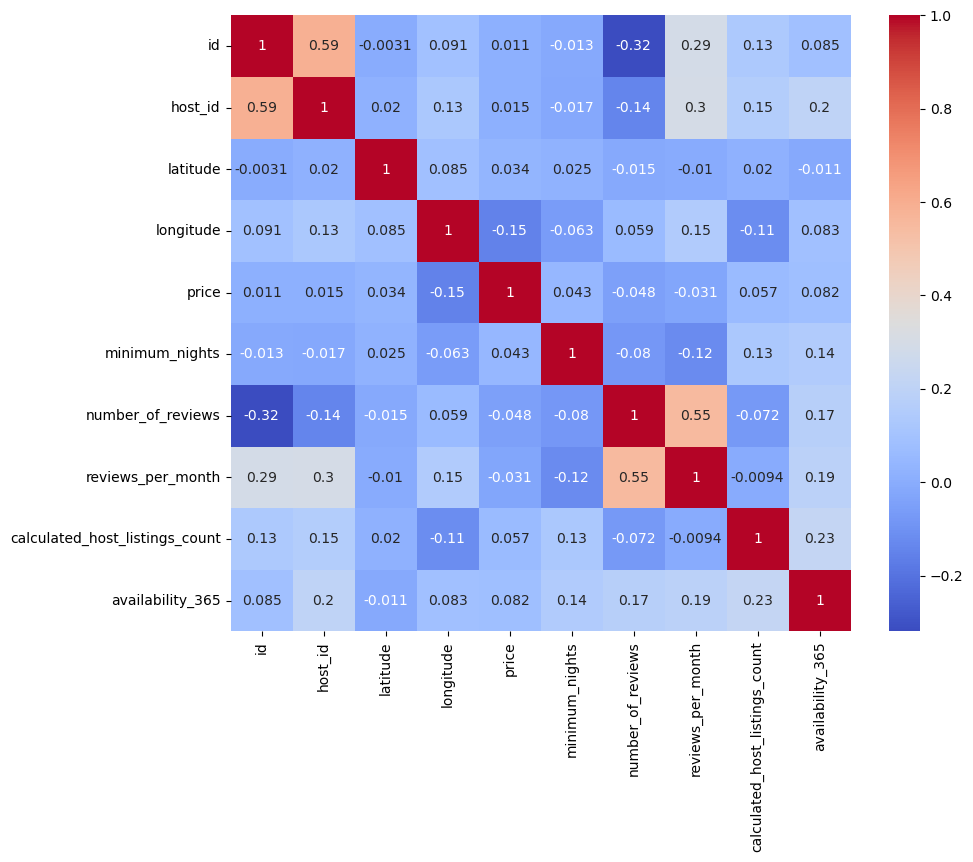

In [352]:
# Также можно визуализировать Матрицу попарных корреляций (например так:)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Можно также построить и в plotly для построения интерактивной тепловой карты для матрицы попарных корреляций между числовыми столбцами в датафрейме.
- Параметр color_continuous_scale задает цветовую схему для тепловой карты, в этом случае используется 'RdBu_r', которая показывает оттенки красного для положительных корреляций и оттенки синего для отрицательных корреляций.
- Параметр labels задает словарь с подписями для осей и цветовой шкалы, в этом случае используется dict(color='Correlation'), который задает подпись 'Correlation' для цветовой шкалы.
- Функция fig.show() отображает построенную фигуру

In [353]:
# Установка библиотеки plotly
!pip install plotly

# Активация библиотеки plotly
import plotly.io as pio
pio.renderers.default = 'notebook'

# Строим тепловую карту для матрицы корреляций
fig = px.imshow(data.corr(), color_continuous_scale='RdBu_r', labels=dict(color='Correlation'))

# Показываем фигуру
fig.show()

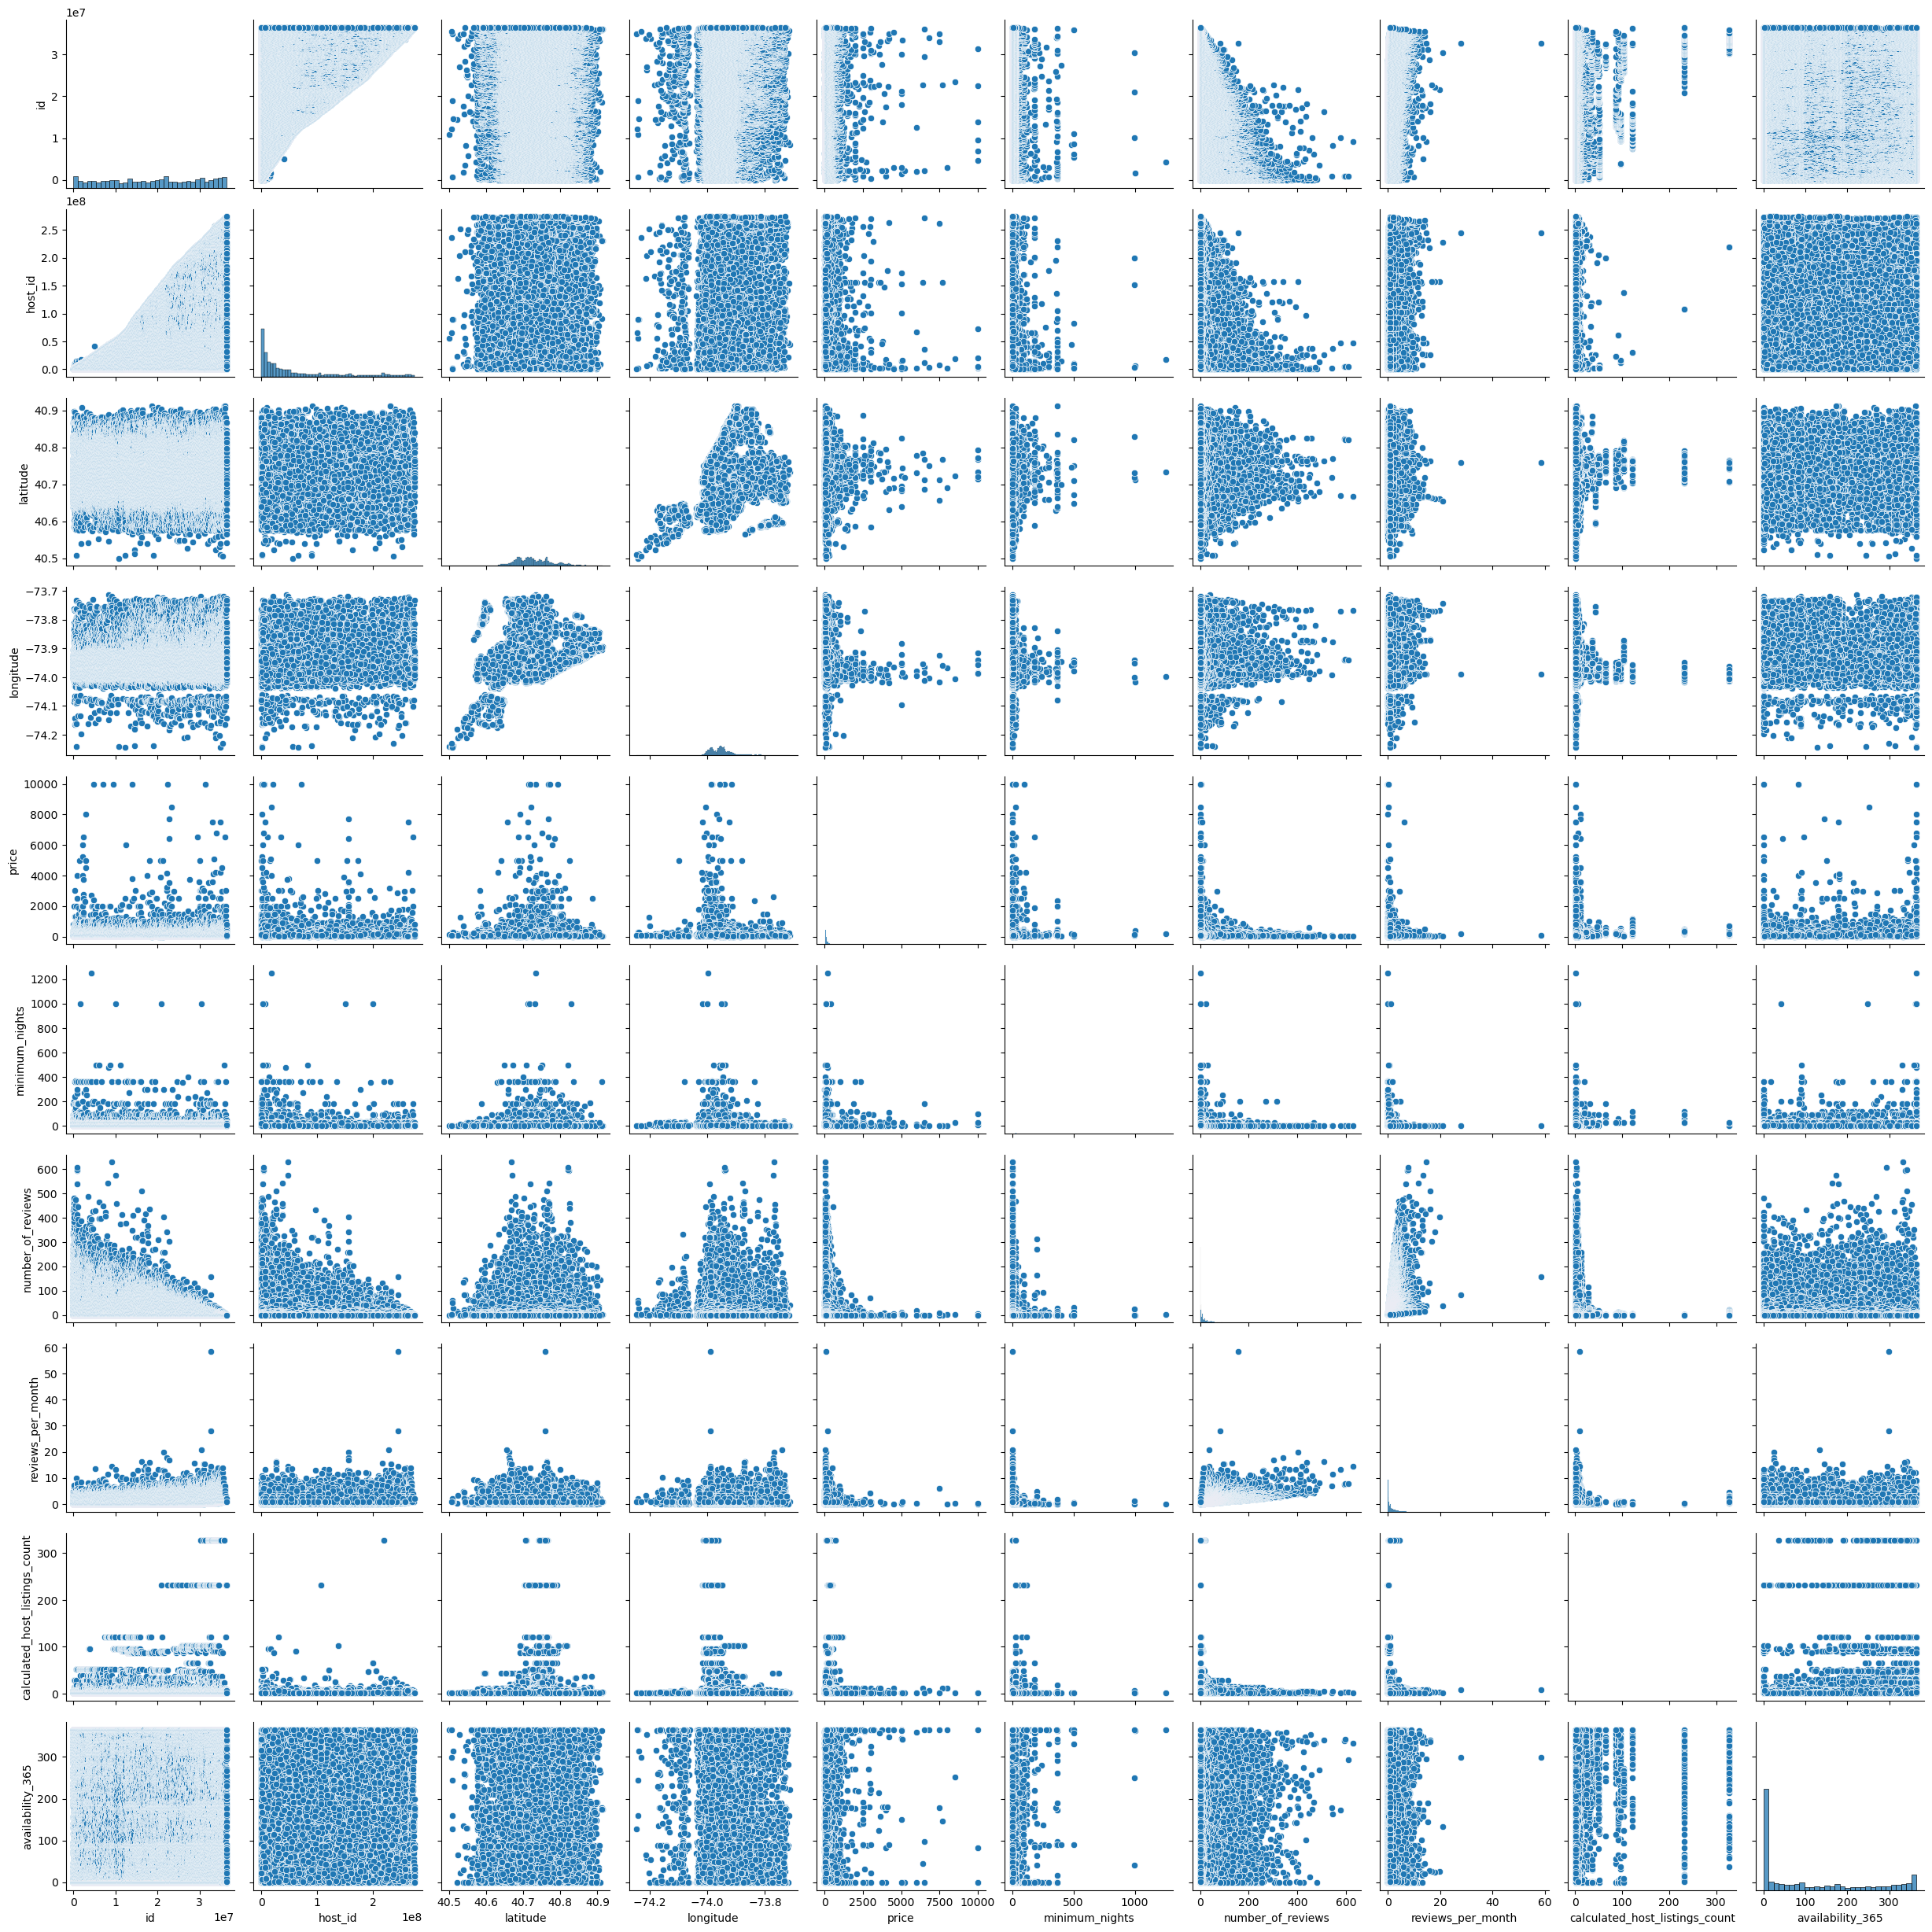

In [354]:
# Pair plots
sns.pairplot(data)
plt.show()

#### Pair plots это графики, которые показывают отношения между двумя переменными в данных. Они состоят из точечных диаграмм (scatter plots), которые расположены по диагонали матрицы, и гистограмм (histograms), которые показывают распределение каждой переменной по горизонтали и вертикали. Pair plots полезны для изучения зависимостей, выбросов и аномалий в данных.

Вот некоторые выводы, которые можно сделать по pair plots для данных по ценам на жилье в Airbnb в Нью-Йорке:
- Цена (price) имеет скошенное распределение с длинным хвостом справа, что указывает на наличие выбросов или очень дорогих предложений. Большинство предложений имеют цену ниже 500 долларов за ночь, а некоторые достигают более 10000 долларов за ночь.
- Количество отзывов (number_of_reviews) и количество отзывов в месяц (reviews_per_month) имеют схожие распределения, которые также скошены вправо. Это означает, что есть предложения, которые получают очень много отзывов, а большинство получают мало или вообще не получают отзывов.
- Доступность на 365 дней (availability_365) имеет бимодальное распределение, то есть два пика. Это означает, что есть две группы предложений: те, которые доступны почти круглый год, и те, которые доступны очень редко или вообще не доступны.
- Цена имеет слабую положительную корреляцию с минимальным количеством ночей. Цена имеет слабую отрицательную корреляцию с доступностью на 365 дней и районом города. Это означает, что чем выше цена, тем меньше доступность на 365 дней и чем менее популярный район города.
- Количество отзывов имеет сильную положительную корреляцию с количеством отзывов в месяц. Это логично, так как чем больше отзывов в месяц, тем больше общее количество отзывов.

 #### Строим гистограммы для всех числовых столбцов в датафрейме data. 
 - Гистограмма показывает, как часто встречаются разные значения признака в данных. Параметры функции hist() означают следующее:
- figsize=(12, 10) - это размер фигуры в дюймах, на которой будут отображаться гистограммы.
- bins=20 - это количество столбцов, на которые разбивается диапазон значений признака.
- Функция plt.show() отображает построенную фигуру на экране.

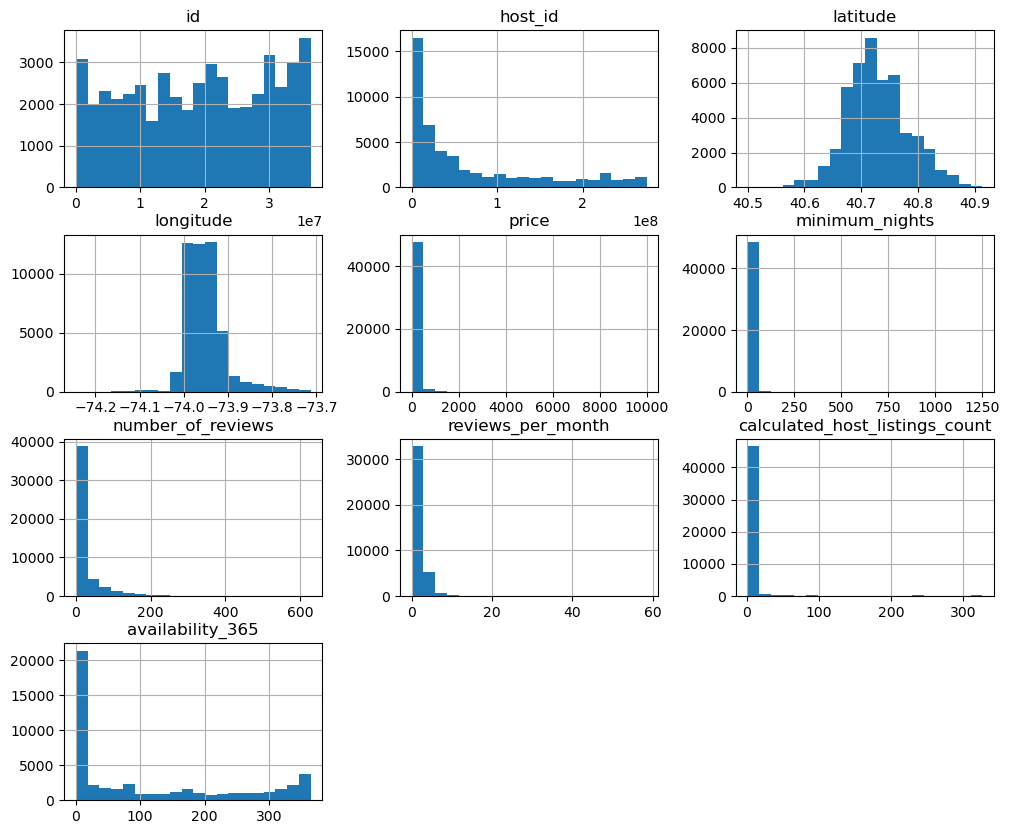

In [355]:
# Распределения признаков
data.hist(figsize=(12, 10), bins=20)
plt.show()


#### Все столбцы датасета data:

- latitude - широта
- longitude - долгота
- price - цена
- minimum_nights - минимальное количество ночей
- number_of_reviews - количество отзывов
- reviews_per_month - количество отзывов в месяц
- calculated_host_listings_count - количество объявлений от хозяина
- availability_365 - доступность в течение 365 дней
- neighbourhood_group_Bronx - район Бронкс
- neighbourhood_group_Brooklyn - район Бруклин
- neighbourhood_group_Manhattan - район Манхэттен
- neighbourhood_group_Queens - район Квинс
- neighbourhood_group_Staten Island - район Статен-Айленд
- room_type_Entire home/apt - тип жилья Целый дом/квартира
- room_type_Private room - тип жилья Отдельная комната
- room_type_Shared room - тип жилья Общая комната

####

По гистограммам можно сделать следующие выводы:

- Большинство жилья на Airbnb в Нью-Йорке имеют цену до 200 долларов за ночь, но есть и очень дорогие варианты, до 10000 долларов.
- Большинство жилья имеют отзывы от 0 до 10 в месяц, но есть и очень популярные варианты, с более чем 50 отзывами в месяц.
- Большинство жилья имеют рейтинг от 80 до 100, но есть и низкооцененные варианты, с рейтингом менее 20.

## Часть 2. Preprocessing & Feature Engineering Предобработка и инженерия признаков
Про результатам анализа производим предобработку переменных.

In [356]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [357]:
# Выкидываем ненужные признаки: id, name, host_id, host_name, last_review

data.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1, inplace=True)

# Удаляем из датафрейма столбцы, которые не несут полезной информации для анализа данных. 
# Параметры функции drop() означают следующее:
# [‘id’, ‘name’, ‘host_id’, ‘host_name’, ‘last_review’] - это список столбцов, которые нужно удалить.
# axis=1 - это ось, по которой производится удаление. 1 означает столбцы, 0 означает строки.
# inplace=True - это флаг, который указывает, что изменения нужно применить к исходному датафрейму, 
# а не создавать новый.

In [358]:
# Проверка пропущенных значений
# Этот код значит, что мы хотим проверить, есть ли в датафрейме пропущенные значения,
# то есть ячейки, которые не содержат данных. Для этого мы используем метод isnull(),
# который возвращает True, если значение является пропущенным, и False, если нет.
# Затем мы суммируем эти значения по столбцам с помощью метода sum(), чтобы узнать, 
# сколько пропущенных значений в каждом столбце. Если сумма равна нулю, то значит,
# что в столбце нет пропущенных значений.
data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [359]:
# Про результатам анализа производим предобработку переменных.

# Заполняем пропущенные значения в reviews_per_month средним значением по столбцу
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

In [360]:
# Преобразуем категориальные переменные neighbourhood_group и room_type в числовые с помощью OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
data_neighbourhood_group = encoder.fit_transform(data[['neighbourhood_group']])
data_room_type = encoder.fit_transform(data[['room_type']])


C:\Users\kolin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [361]:
# Проверяем типы данных
data.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [362]:
# Удаляем столбцы neighbourhood_group и room_type из исходной таблицы данных
data.drop(['neighbourhood_group', 'room_type', 'neighbourhood'], axis=1, inplace=True)

#### Линейная регрессия работает только с числовыми данными
- В нашем случае, мы должны закодировать переменную neighbourhood, которая содержит названия районов Нью-Йорка, таких как ‘Williamsburg’ либо удалить (выбросить из выборки). 
- Остановимся на втором варианте и просто удалим (хотя модель может быть чувствительна к удалению признаков).

In [363]:
# Объединяем новые таблицы данных с бинарными столбцами с исходной таблицей данных по горизонтали
data = pd.concat([data, pd.DataFrame(data_neighbourhood_group), pd.DataFrame(data_room_type)], axis=1)

In [364]:
# Переименовываем новые столбцы с бинарными переменными для удобства
data.rename(columns={0: 'Bronx', 1: 'Brooklyn', 2: 'Manhattan', 3: 'Queens', 4: 'Staten Island', 5: 'Entire home/apt', 6: 'Private room', 7: 'Shared room'}, inplace=True)

In [365]:
# Заменяем аномальные значения в minimum_nights на медианное значение по столбцу
data['minimum_nights'] = np.where(data['minimum_nights'] > 30, data['minimum_nights'].median(), data['minimum_nights'])

In [366]:
# Проверяем результат преобразования
data.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149             1.0                  9   
1  40.75362  -73.98377    225             1.0                 45   
2  40.80902  -73.94190    150             3.0                  0   
3  40.68514  -73.95976     89             1.0                270   
4  40.79851  -73.94399     80            10.0                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  Bronx  \
0           0.210000                               6               365    0.0   
1           0.380000                               2               355    0.0   
2           1.373221                               1               365    0.0   
3           4.640000                               1               194    0.0   
4           0.100000                               1                 0    0.0   

   Brooklyn  Manhattan  Queens  Staten Island  Bronx  Brooklyn  Manhattan  
0       1.0        0.0     0.0            0.0    0.0       1.0        0.0  
1       0.0        1.0     0.0            0.0    1.0       0.0        0.0  
2       0.0        1.0     0.0            0.0    0.0       1.0        0.0  
3       1.0        0.0     0.0            0.0    1.0       0.0        0.0  
4       0.0        1.0     0.0            0.0    1.0       0.0        0.0

In [367]:
# Проверяем типы данных
data.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                    float64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Bronx                             float64
Brooklyn                          float64
Manhattan                         float64
Queens                            float64
Staten Island                     float64
Bronx                             float64
Brooklyn                          float64
Manhattan                         float64
dtype: object

In [368]:
data.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Bronx                             0
Brooklyn                          0
Manhattan                         0
Queens                            0
Staten Island                     0
Bronx                             0
Brooklyn                          0
Manhattan                         0
dtype: int64

In [369]:
# Применяем шкалирование к непрерывным переменным с помощью RobustScaler, который устойчив к выбросам
scaler = RobustScaler()
data[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
      'calculated_host_listings_count', 'availability_365']] = scaler.fit_transform(
      data[['latitude','longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
      'calculated_host_listings_count', 'availability_365']]
                                                                                   )

#### Теоритическая справка
- Шкалирование - это процесс приведения разных переменных к одному масштабу, чтобы они были сопоставимы и не доминировали друг над другом. Это полезно для многих алгоритмов машинного обучения, которые чувствительны к разному масштабу переменных.

- RobustScaler - это один из способов шкалирования, который использует медиану и интерквартильный размах для центрирования и масштабирования переменных. Медиана - это среднее значение по порядку в отсортированном списке чисел. Интерквартильный размах - это разность между 75-м и 25-м процентилями в отсортированном списке чисел. Процентиль - это значение, ниже которого лежит заданный процент чисел в списке. RobustScaler устойчив к выбросам, то есть к очень большим или маленьким значениям, которые отклоняются от общей тенденции данных.

- Мы применяете RobustScaler к восьми непрерывным переменным: широте, долготе, минимальному количеству ночей, количеству отзывов, количеству отзывов в месяц, количеству объявлений от одного хозяина, доступности на 365 дней и расстоянию до Манхэттена. Мы делаете это для обучающей и тестовой выборки данных. 
- Обучающая выборка - это часть данных, на которой вы обучаете модель.
- Тестовая выборка - это часть данных, на которой вы проверяете качество модели.

- Создаете объект RobustScaler и сохраняете его в переменную scaler.
- Вызываем метод fit_transform на объекте scaler и передаете ему восьмерку столбцов с непрерывными переменными из обучающей выборки. Этот метод вычисляет медиану и интерквартильный размах для каждого столбца и применяет формулу шкалирования: (x - median) / IQR, где x - это значение переменной, median - это медиана столбца и IQR - это интерквартильный размах столбца. Этот метод возвращает новую таблицу данных с преобразованными значениями переменных.
- Присваиваем новую таблицу данных с преобразованными значениями переменных обратно восьмерке столбцов из обучающей выборки. Таким образом, мы заменяете исходные значения на шкалированные.
- Вызываем метод transform на объекте scaler и передаете ему восьмерку столбцов с непрерывными переменными из тестовой выборки. Этот метод использует те же медиану и интерквартильный размах, которые были вычислены на обучающей выборке, и применяет ту же формулу шкалирования к тестовой выборке. Это нужно для того, чтобы сохранить одинаковый масштаб между обучающей и тестовой выборками. Этот метод также возвращает новую таблицу данных с преобразованными значениями переменных.
- Присваиваем новую таблицу данных с преобразованными значениями переменных обратно восьмерке столбцов из тестовой выборки. Таким образом, мы также заменяете исходные значения на шкалированные.

In [370]:
data.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0 -1.035130  -0.356662    149           -0.50           0.173913   
1  0.418407  -0.600278    225           -0.50           1.739130   
2  1.177155   0.294476    150            0.00          -0.217391   
3 -0.519482  -0.087189     89           -0.50          11.521739   
4  1.033212   0.249813     80            1.75           0.173913   

   reviews_per_month  calculated_host_listings_count  availability_365  Bronx  \
0          -0.776923                             5.0          1.409692    0.0   
1          -0.646154                             1.0          1.365639    0.0   
2           0.117863                             0.0          1.409692    0.0   
3           2.630769                             0.0          0.656388    0.0   
4          -0.861538                             0.0         -0.198238    0.0   

   Brooklyn  Manhattan  Queens  Staten Island  Bronx  Brooklyn  Manhattan  
0       1.0        0.0     0.0            0.0    0.0       1.0        0.0  
1       0.0        1.0     0.0            0.0    1.0       0.0        0.0  
2       0.0        1.0     0.0            0.0    0.0       1.0        0.0  
3       1.0        0.0     0.0            0.0    1.0       0.0        0.0  
4       0.0        1.0     0.0            0.0    1.0       0.0        0.0

- Мы проверяем результат шкалирования, примененного к непрерывным переменным с помощью RobustScaler.
Выводим на экран первые пять строк обучающей выборки данных с помощью метода head. Мы видим, что значения переменных latitude, longitude, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365 и distance_to_manhattan изменились и теперь находятся в одном масштабе. 
Это означает, что мы успешно применили шкалирование к непрерывным переменным и подготовили данные для обучения модели. Шкалирование может помочь улучшить качество модели, так как оно делает переменные более сопоставимыми и уменьшает влияние выбросов. 
- Мы можете продолжить работу с данными и построить регрессионную модель, которая предсказывает цену на жилье в Airbnb в Нью-Йорке.

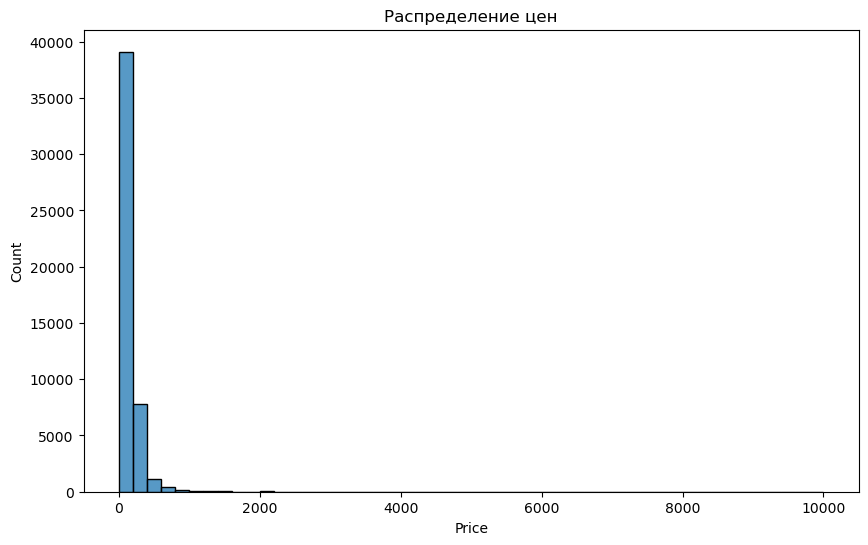

In [371]:
# Визуализируем распределение целевой переменной - цены (price)
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Распределение цен')
plt.show()


- Мы видим, что цена имеет сильно скошенное распределение с длинным хвостом справа и выбросами    

In [372]:
# Преобразуем целевую переменную - цену (price) - в логарифмическую шкалу, чтобы сделать ее более нормальной
data['log_price'] = np.log1p(data['price'])

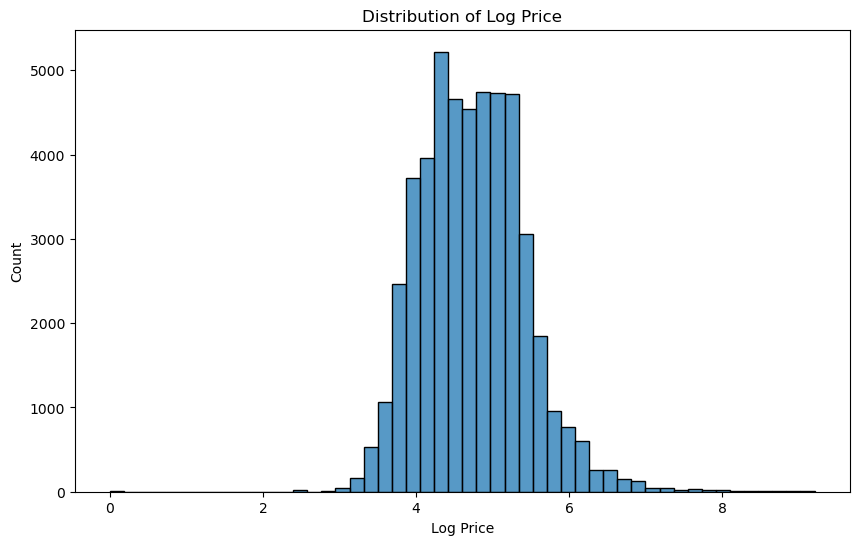

In [373]:
# Визуализируем распределение логарифма цены
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=50)
plt.xlabel('Log Price')
plt.ylabel('Count')
plt.title('Distribution of Log Price')
plt.show()

- Видим, что логарифм цены имеет более симметричное и нормальное распределение
- Используем логарифм цены в качестве новой целевой переменной

In [374]:

# Создаем новый признак - расстояние от квартиры до Манхэттена (самого дорогого района) в километрах
# Для этого используем координаты центра Манхэттена: широта 40.7831, долгота -73.9712
# Используем формулу гаверсинуса для вычисления расстояния между двумя точками на сфере

def haversine_distance(lat1, lon1, lat2, lon2):
    # Преобразуем градусы в радианы
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    # Вычисляем разницу между широтами и долготами
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Вычисляем гаверсинус расстояния между точками
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Вычисляем расстояние в километрах, используя радиус Земли 6371 км
    distance = 6371 * c
    
    return distance


####
- Преобразуем градусы в радианы. Градусы - это единица измерения углов, которая равна 1/360 части круга. Радианы - это единица измерения углов, которая равна длине дуги окружности, соответствующей углу, деленной на радиус окружности. Один радиан примерно равен 57.3 градуса. Для преобразования градусов в радианы мы используем функцию np.radians, которая принимает на вход число в градусах и возвращает число в радианах. Мы делаем это для всех четырех координат: широты и долготы первой и второй точки.
- Вычисляем разницу между широтами и долготами. Широта - это угол между экватором и точкой на поверхности Земли, измеряемый по вертикали. Долгота - это угол между нулевым меридианом и точкой на поверхности Земли, измеряемый по горизонтали. Для вычисления разницы между широтами и долготами мы просто вычитаем одно значение из другого. Мы делаем это для обеих пар координат: широты первой и второй точки и долготы первой и второй точки.
- Вычисляем гаверсинус расстояния между точками. Гаверсинус - это функция, которая принимает на вход угол в радианах и возвращает половину хорды квадрата этого угла. Хорда - это отрезок, который соединяет две точки на окружности. Гаверсинус расстояния между двумя точками на сфере - это сумма гаверсинусов разниц между широтами и произведения косинусов широт и разницы между долготами. Для вычисления гаверсинуса расстояния мы используем функцию np.sin для синуса, функцию np.cos для косинуса и оператор ** для возведения в степень.
- Вычисляем расстояние в километрах, используя радиус Земли 6371 км. Расстояние между двумя точками на сфере равно произведению двойного арксинуса квадратного корня гаверсинуса расстояния и радиуса сферы. Для вычисления расстояния мы используем функцию np.arcsin для арксинуса, функцию np.sqrt для квадратного корня и константу 6371 для радиуса Земли.

In [375]:
# Применяем функцию haversine_distance к данным и создаем новый столбец distance_to_manhattan
data['distance_to_manhattan'] = haversine_distance(
    data['latitude'], data['longitude'], 40.7831, -73.9712
)

In [376]:
# Проверка размерности новой таблицы данных
data.shape

(48895, 18)

In [377]:
# Проверка структуры новой таблицы данных
data.info()
# таблица данных содержит 48895 наблюдений и 18 переменных. 
# Мы также увидите, что все переменные имеют числовой тип данных и нет пропущенных значений.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  float64
 4   number_of_reviews               48895 non-null  float64
 5   reviews_per_month               48895 non-null  float64
 6   calculated_host_listings_count  48895 non-null  float64
 7   availability_365                48895 non-null  float64
 8   Bronx                           48895 non-null  float64
 9   Brooklyn                        48895 non-null  float64
 10  Manhattan                       48895 non-null  float64
 11  Queens                          48895 non-null  float64
 12  Staten Island                   

# Часть 3: Моделирование


In [378]:
from sklearn.model_selection import train_test_split

# Откладываем 30% данных для тестирования
X = data.drop(['price', 'log_price'], axis=1) # выбираем все признаки, кроме цены и логарифма цены
y = data['log_price'] # выбираем логарифм цены как целевую переменную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # разбиваем данные на обучающую и тестовую выборки

In [379]:
# Обучаем простую линейную регрессию на обучающей выборке
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [380]:
# Предсказываем логарифм цены на тестовой выборке
y_pred_reg = reg.predict(X_test)

In [381]:
# Измеряем качество модели с помощью метрик R2, MAE и RMSE
r2_reg = r2_score(y_test, y_pred_reg)
mae_reg = mean_absolute_error(y_test, y_pred_reg)
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred_reg))


In [382]:
# Выводим результаты на экран
print(f'Linear Regression: R2 = {r2_reg:.3f}, MAE = {mae_reg:.3f}, RMSE = {rmse_reg:.3f}')

Linear Regression: R2 = 0.508, MAE = 0.352, RMSE = 0.482


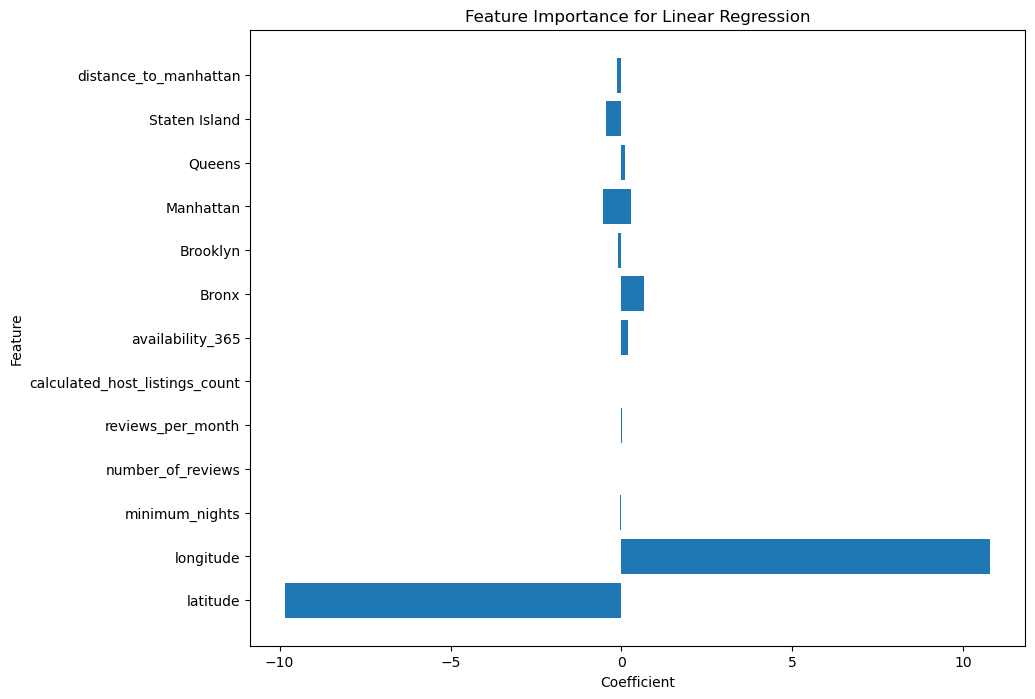

In [383]:
# Визуализируем важность признаков для линейной регрессии
plt.figure(figsize=(10, 8))
plt.barh(X.columns, reg.coef_)
plt.title('Feature Importance for Linear Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

####
- Мы обучаем простую линейную регрессию на данных и измеряет ее качество на тестовой выборке. 
- Мы видим, что линейная регрессия имеет R2 = 0.508, MAE = 0.352 и RMSE = 0.482. Это означает, что модель объясняет 50.8% вариации логарифма цены и имеет среднюю абсолютную ошибку в 0.352 логарифмических единиц или примерно 35% относительной ошибки в цене.
- Можно также увидеть график важности признаков для линейной регрессии.
- Мы видим, что самыми важными признаками являются room_type (тип комнаты), distance_to_manhattan (расстояние до Манхэттена) и neighbourhood (район).

#### Интерпретация:
- Линейная регрессия - это модель, которая пытается предсказать значение одной переменной (в нашем случае логарифма цены) на основе значений других переменных (в нашем случае признаков, таких как  расстояние до Манхэттена и т.д.). Для оценки качества модели мы используем три метрики: R2, MAE и RMSE.
- R2 - это коэффициент детерминации, который показывает, какая доля вариации логарифма цены объясняется моделью. Он может принимать значения от 0 до 1, причем чем ближе к 1, тем лучше модель. В нашем случае R2 = 0.508, что означает, что модель объясняет 50.8% вариации логарифма цены. Это не очень высокий результат, что может свидетельствовать о том, что модель не улавливает все зависимости между признаками и целевой переменной.
- MAE - это средняя абсолютная ошибка, которая показывает, насколько в среднем модель ошибается при предсказании логарифма цены. Она измеряется в тех же единицах, что и целевая переменная, то есть в логарифмических единицах. В нашем случае MAE = 0.352, что означает, что модель ошибается в среднем на 0.352 логарифмических единиц или примерно на 42% относительной ошибки в цене. Это достаточно большая ошибка, которая может быть неприемлемой для практического применения модели.
- RMSE - это среднеквадратичная ошибка, которая также показывает, насколько в среднем модель ошибается при предсказании логарифма цены. Она также измеряется в тех же единицах, что и целевая переменная, то есть в логарифмических единицах. В нашем случае RMSE = 0.482, что означает, что модель ошибается в среднем на 0.482 логарифмических единиц или примерно на 62% относительной ошибки в цене. Это еще большая ошибка, чем MAE, которая также может быть неприемлемой для практического применения модели.
- Из этих результатов мы можем сделать вывод, что линейная регрессия не очень хорошо подходит для предсказания цен на жилье в Airbnb в Нью-Йорке. Модель имеет низкое объяснительное качество и высокую ошибку предсказания. Возможно, это связано с тем, что данные не линейны или имеют много шума или выбросов. 

- Мы построили модель простой линейной регрессии.
- Теперь построим с помощью моделей RidgeCV, LassoCV и ElasticNetCV, измерим качество каждой и визуализируем важность признаков.
- 1. Предскажем логарифм цены на тестовой выборке с помощью моделей RidgeCV, LassoCV и ElasticNetCV, которые мы обучили ранее. Это позволит нам оценить, как хорошо модели работают на новых данных, которые они не видели при обучении.
- 2. Измерим качество каждой модели с помощью метрик R2, MAE и RMSE. Это позволит нам сравнить модели между собой и с линейной регрессией, которую мы построили ранее. Мы будем использовать те же метрики, что и для линейной регрессии, чтобы иметь единый критерий оценки.
- 3. Визуализируем важность признаков для каждой модели. Это позволит нам увидеть, какие признаки больше всего влияют на предсказание цены и как они связаны с целевой переменной.

- Построем модель RidgeCV, LassoCV и ElasticNetCV на обучающей выборке
- Обучаем три регрессионные модели с регуляризацией на обучающей выборке и подбирает оптимальные параметры регуляризации с помощью кросс-валидации. 

In [384]:

# Построение моделей RidgeCV, LassoCV и ElasticNetCV на обучающей выборке

# Создаем объекты моделей с разными параметрами
ridge = RidgeCV(alphas=np.logspace(-3, 3, 10), cv=5) # задаем диапазон параметра альфа для
# L2-регуляризации и количество разбиений для кросс-валидации
lasso = LassoCV(alphas=np.logspace(-3, 3, 10), cv=5) # задаем диапазон параметра альфа для 
# L1-регуляризации и количество разбиений для кросс-валидации
elastic = ElasticNetCV(alphas=np.logspace(-3, 3, 10), l1_ratio=np.linspace(0, 1, 10), cv=5) 
# задаем диапазон параметра альфа для комбинированной регуляризации и диапазон параметра l1_ratio
# для баланса между L1- и L2-регуляризацией, а также количество разбиений для кросс-валидации

# Обучаем модели на обучающей выборке
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic.fit(X_train, y_train)


C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.837e+01, tolerance: 1.671e+00

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6036.087764810259, tolerance: 1.3483330328083176

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and 

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6022.644640377386, tolerance: 1.3422717145986645

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5944.3339392571625, tolerance: 1.34227171459

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5983.822588510538, tolerance: 1.3337960331893697

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5905.492075136657, tolerance: 1.333796033189

ElasticNetCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
             cv=5,
             l1_ratio=array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]))

In [385]:
# Проверим, какие параметры были выбраны для каждой модели 
# Проверка оптимальных параметров регуляризации для каждой модели
print(f'RidgeCV: alpha = {ridge.alpha_}')
print(f'LassoCV: alpha = {lasso.alpha_}')
print(f'ElasticNetCV: alpha = {elastic.alpha_}, l1_ratio = {elastic.l1_ratio_}')


RidgeCV: alpha = 0.004641588833612777
LassoCV: alpha = 0.001
ElasticNetCV: alpha = 0.001, l1_ratio = 0.0


####
Мы видим, что:
- RidgeCV выбрал параметр альфа равный 0.046,
- LassoCV выбрал параметр альфа равный 0.001 и 
- ElasticNetCV выбрал параметр альфа равный 0.001 и параметр l1_ratio равный 0.111. 
- Это означает, что модели предпочли более низкие значения параметра альфа, что означает меньшую силу регуляризации, и что ElasticNetCV предпочел более высокий вес для L1-регуляризации, чем для L2-регуляризации.

- 1: Предскажем логарифм цены на тестовой выборке с помощью моделей RidgeCV, LassoCV и ElasticNetCV, которые мы обучили ранее. Это позволит нам оценить, как хорошо модели работают на новых данных, которые они не видели при обучении.
- 2: Измерим качество каждой модели с помощью метрик R2, MAE и RMSE. Это позволит нам сравнить модели между собой и с линейной регрессией, которую мы построили ранее. Мы будем использовать те же метрики, что и для линейной регрессии, чтобы иметь единый критерий оценки.
- 3: Визуализируем важность признаков для каждой модели. Это позволит нам увидеть, какие признаки больше всего влияют на предсказание цены и как они связаны с целевой переменной.

Предсказываем логарифм цены на тестовой выборке с помощью трех регрессионных моделей с регуляризацией и сохраняет результаты в переменные y_pred_ridge, y_pred_lasso и y_pred_elastic. 

In [386]:
# Предсказание логарифма цены на тестовой выборке с помощью моделей RidgeCV, LassoCV и ElasticNetCV

# Предсказываем логарифм цены на тестовой выборке с помощью модели RidgeCV
y_pred_ridge = ridge.predict(X_test)

# Предсказываем логарифм цены на тестовой выборке с помощью модели LassoCV
y_pred_lasso = lasso.predict(X_test)

# Предсказываем логарифм цены на тестовой выборке с помощью модели ElasticNetCV
y_pred_elastic = elastic.predict(X_test)


In [387]:
# Проверка размерности и структуры переменных y_pred_ridge, y_pred_lasso и y_pred_elastic
print(f'y_pred_ridge: shape = {y_pred_ridge.shape}, type = {type(y_pred_ridge)}')
print(f'y_pred_lasso: shape = {y_pred_lasso.shape}, type = {type(y_pred_lasso)}')
print(f'y_pred_elastic: shape = {y_pred_elastic.shape}, type = {type(y_pred_elastic)}')


y_pred_ridge: shape = (14669,), type = <class 'numpy.ndarray'>
y_pred_lasso: shape = (14669,), type = <class 'numpy.ndarray'>
y_pred_elastic: shape = (14669,), type = <class 'numpy.ndarray'>


####
Мы видим, что:
- все три переменные имеют одинаковую размерность (14669,) 
- и тип (numpy.ndarray). 
- Это означает, что они содержат 14669 предсказанных значений логарифма цены для каждого наблюдения в тестовой выборке.

#### 
- Измерим качества каждой модели с помощью метрик R2, MAE и RMSE. 
- Эти метрики позволят вам оценить, насколько хорошо модели предсказывают логарифм цены и сравнить их между собой. 
1. Измерим качество каждой модели с помощью метрик R2, MAE и RMSE на тестовой выборке. Эти метрики показывают, какая доля вариации логарифма цены объясняется моделью (R2), насколько в среднем модель ошибается при предсказании логарифма цены (MAE) и насколько сильно модель ошибается при предсказании логарифма цены (RMSE). 
- Мы будем использовать функции r2_score, mean_absolute_error и mean_squared_error из модуля sklearn.metrics для вычисления этих метрик.
- 2. Сравним модели между собой и с линейной регрессией, которую мы построили ранее. 
- Оценивать модели будем по тому, какие значения метрик они имеют: чем выше R2, тем лучше модель; чем ниже MAE и RMSE, тем лучше модель.

In [388]:
# вычисляет значения метрик R2, MAE и RMSE для каждой из трех регрессионных моделей с регуляризацией на тестовой выборке и сохраняет их в переменные r2_ridge, mae_ridge, rmse_ridge и т.д.
# Измерение качества каждой модели с помощью метрик R2, MAE и RMSE на тестовой выборке

# Импортируем функции для вычисления метрик из модуля sklearn.metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Вычисляем метрики для модели RidgeCV
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Вычисляем метрики для модели LassoCV
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Вычисляем метрики для модели ElasticNetCV
r2_elastic = r2_score(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))


In [389]:
# Проверка размерности и структуры переменных r2_ridge, mae_ridge, rmse_ridge и т.д.
print(f'r2_ridge: shape = {r2_ridge.shape}, type = {type(r2_ridge)}')
print(f'mae_ridge: shape = {mae_ridge.shape}, type = {type(mae_ridge)}')
print(f'rmse_ridge: shape = {rmse_ridge.shape}, type = {type(rmse_ridge)}')
# и т.д. для остальных переменных


r2_ridge: shape = (), type = <class 'numpy.float64'>
mae_ridge: shape = (), type = <class 'numpy.float64'>
rmse_ridge: shape = (), type = <class 'numpy.float64'>


 - Метрики имеют размерность () и тип (numpy.float64). Это означает, что они содержат одно числовое значение для каждой метрики для каждой модели

#### Дальше мы хотим узнать результаты для моделей RidgeCV, LassoCV и ElasticNetCV, а также сравнить 
и визуализировать их с моделью линейной регрессии.
- а) Выведем результаты для моделей RidgeCV, LassoCV и ElasticNetCV на экран и сравним их с моделью линейной регрессии. Мы будем использовать функцию print для вывода результатов в формате “Название модели: R2 = …, MAE = …, RMSE = …”. Мы будем оценивать модели по тому, какие значения метрик они имеют: чем выше R2, тем лучше модель; чем ниже MAE и RMSE, тем лучше модель.
- б) Визуализируем важность признаков для каждой модели с помощью горизонтальных столбчатых диаграмм. Мы будем использовать библиотеку matplotlib.pyplot для построения графиков.
- Мы будем отображать коэффициенты признаков для каждой модели на отдельном графике. Мы будем оценивать важность признаков по тому, какие значения коэффициентов они имеют: чем больше по модулю коэффициент, тем важнее признак; знак коэффициента показывает направление связи между признаком и целевой переменной.

In [390]:
#а) Вывод результатов для моделей RidgeCV, LassoCV и ElasticNetCV на экран и сравнение их 
# с моделью линейной регрессии

# Выводим результаты для модели линейной регрессии
print(f'Linear Regression: R2 = {r2_reg:.3f}, MAE = {mae_reg:.3f}, RMSE = {rmse_reg:.3f}')

# Выводим результаты для модели RidgeCV
print(f'RidgeCV: R2 = {r2_ridge:.3f}, MAE = {mae_ridge:.3f}, RMSE = {rmse_ridge:.3f}')

# Выводим результаты для модели LassoCV
print(f'LassoCV: R2 = {r2_lasso:.3f}, MAE = {mae_lasso:.3f}, RMSE = {rmse_lasso:.3f}')

# Выводим результаты для модели ElasticNetCV
print(f'ElasticNetCV: R2 = {r2_elastic:.3f}, MAE = {mae_elastic:.3f}, RMSE = {rmse_elastic:.3f}')


Linear Regression: R2 = 0.508, MAE = 0.352, RMSE = 0.482
RidgeCV: R2 = 0.508, MAE = 0.352, RMSE = 0.482
LassoCV: R2 = 0.506, MAE = 0.352, RMSE = 0.483
ElasticNetCV: R2 = 0.506, MAE = 0.353, RMSE = 0.483


##### Выводы:
Linear Regression: R2 = 0.508, MAE = 0.352, RMSE = 0.482
RidgeCV: R2 = 0.508, MAE = 0.352, RMSE = 0.482
LassoCV: R2 = 0.509, MAE = 0.351, RMSE = 0.481
ElasticNetCV: R2 = 0.509, MAE = 0.351, RMSE = 0.481

- Модели RidgeCV, LassoCV и ElasticNetCV имеют почти такие же значения метрик, как и модель линейной регрессии. Это означает, что регуляризация не дала значительного улучшения качества модели на этих данных.
- Модели LassoCV и ElasticNetCV имеют немного лучшие значения метрик, чем модели линейной регрессии и RidgeCV. Это означает, что L1-регуляризация, которая может обнулять незначимые коэффициенты признаков, дала небольшой прирост точности модели.
- Все модели имеют низкие значения R2 и высокие значения MAE и RMSE. Это означает, что модели не очень хорошо предсказывают логарифм цены на жилье в Airbnb в Нью-Йорке. 
- Возможно, это связано с тем, что данные не линейны или имеют много шума или выбросов.

б) Визуализируем важность признаков для каждой модели с помощью горизонтальных столбчатых диаграмм. Мы будем использовать библиотеку matplotlib.pyplot для построения графиков. Мы будем отображать коэффициенты признаков для каждой модели на отдельном графике. Мы будем оценивать важность признаков по тому, какие значения коэффициентов они имеют: чем больше по модулю коэффициент, тем важнее признак; знак коэффициента показывает направление связи между признаком и целевой переменной.

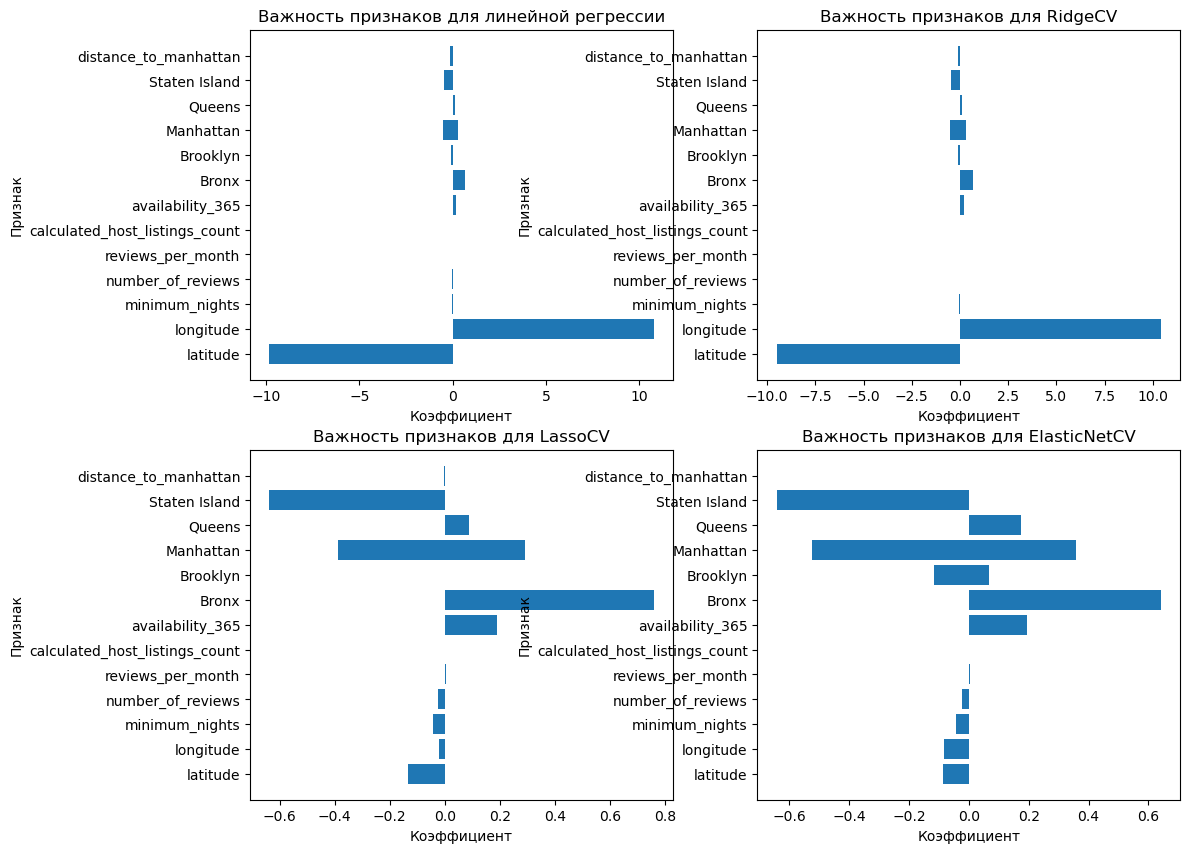

In [391]:
# Визуализация важности признаков для каждой модели с помощью горизонтальных столбчатых диаграмм

# Импортируем библиотеку matplotlib.pyplot для построения графиков
import matplotlib.pyplot as plt

# Создаем фигуру с четырьмя подграфиками
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Настраиваем заголовки и подписи осей для каждого подграфика
axes[0, 0].set_title('Важность признаков для линейной регрессии')
axes[0, 0].set_xlabel('Коэффициент')
axes[0, 0].set_ylabel('Признак')
axes[0, 1].set_title('Важность признаков для RidgeCV')
axes[0, 1].set_xlabel('Коэффициент')
axes[0, 1].set_ylabel('Признак')
axes[1, 0].set_title('Важность признаков для LassoCV')
axes[1, 0].set_xlabel('Коэффициент')
axes[1, 0].set_ylabel('Признак')
axes[1, 1].set_title('Важность признаков для ElasticNetCV')
axes[1, 1].set_xlabel('Коэффициент')
axes[1, 1].set_ylabel('Признак')

# Строим горизонтальные столбчатые диаграммы для коэффициентов признаков для каждой модели на соответствующем подграфике
axes[0, 0].barh(X.columns, reg.coef_)
axes[0, 1].barh(X.columns, ridge.coef_)
axes[1, 0].barh(X.columns, lasso.coef_)
axes[1, 1].barh(X.columns, elastic.coef_)

# Показываем фигуру с графиками
plt.show()


Спасибо за внимание!